# Task 2
You will be asked to replicate, as closely as possible, the convolutional neural network (CNN) proposed in the seminal paper by LeCunn et al. in 1989, and apply it to an image classification task using the MNIST dataset. A PDF copy of the paper is provided in the assessment zip-file (called 1989.lecunn.jackel.pdf).

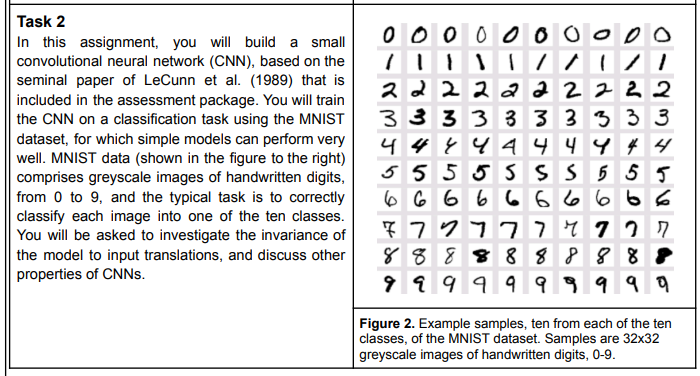

## Subtask 2A
Read the methodological sections of the paper, that is, sections 3 and 4 (subheadings "Network Design" and "Experimental Environment"). Some of the terminology we have used in the lectures had not yet become standard at the time this paper was written. Moreover, some of their techniques are no longer standard practice. Nevertheless, the descriptions should make it possible to understand how the model has been built and trained. Answer the following questions (1 mark per question, and 4 marks for Question 10). Write your answers in the markdown cell below (these answers will not contribute to your word count).

1) What are the dimensions of the input images?
2) How are the input images preprocessed?
3) How many convolutional layers are there?
4) How many fully connected layers are there?
5) What are the dimensions of the filters used in the first convolutional layer (height x width x depth)?
6) What are the dimensions of the filters used in the second convolutional layer (height x width x depth)?
7) How many filters are used for each of the convolutional layers?
8) What stride is used for each convolutional layer?
9) What is the padding size used for each convolutional layer?
10) For each layer, what are the lower and upper limits of weights?
11) How many units (neurons) are in the fully connected hidden layer?
12) How many output units are there?
13) Which two nonlinearities are used in the model?
14) What loss function is used?
15) What type of optimisation is used?
16) What is the batch size?

*Provide your answers in this cell. They will not contribute to your word count.* <ignore>

1)16x16 Normalised Image

2)The original digit images, typically around 40×60 pixels in size, were extracted from U.S. mail by Postal Service contractors. A linear transformation was then applied to normalize the images. They were rescaled, preserving their aspect ratio, and centered within a 16×16 frame. The grayscale values were scaled and translated to fall within the range –1 to  1, resulting in a 16×16 input with multiple gray.

3)2 Convolutional layer

4)2 fully connected layer

5)5x5x1

6)5x5x8

7)12 filters for each convolutional layer

8)2 stride for each convolutional layer

9)constant padding, in this case -1 but the size is still 0

10)Formula: -2.4/Fi and 2.4/Fi

    * Layer 1: Input = 5x5x1 therefore, -2.4/25 and 2.4/25. The weight will be [-0.096, 0.096]
    * Layer 2:Input = 5x5x8 therefore, -2.4/200 and 2.4/200. The weight will be [-0.012, 0.012]
    * Layer 3:Input = 30x30 therefore, -2.4/192 and 2.4/192. The weight will be [-0.0125, 0.0125]
    * Output Layer:Input = 30 therefore, -2.4/30 and 2.4/30. The weight will be [-0.08, 0.08]

11)30 Neurons

12)10 units

13)scaled hyperbolic tangent, sigmoid

14)avaraged squared error or MSE

15)stochastic gradient descent or SGD

16)1, because the model using SGD


## Subtask 2B

For each convolutional layer in their paper, state whether or not the filters correctly tile the inputs to each layer. Use the equation to determine the dimensions of the activation maps to explain your answer.

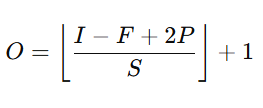

From this formula that I extracted from the lecture slide I can calculate that:

H1: ((16 - 5 + 2 * 0)/2) + 1 = 6

H2: ((8 - 5 + 2 * 0)/2) + 1 = 2

In general, the filters in both convolutional layers (H1 and H2) don’t tile the inputs properly unless padding is added. In the first layer, the input is 16×16 and the filter is 5×5 with a stride of 2. Without padding, this wouldn’t give the 8×8 output stated in the paper, so the input must have been effectively padded to 18×18 to make it fit. The padding value used was –1, which is different from the usual zero padding

The same thing happens in the second layer. The input from H1 is 8×8, and again the filter is 5×5 with a stride of 2. If you plug the numbers into the formula, you don’t get the expected 4×4 output unless you assume a padding of 2. That padding isn’t mentioned directly in the paper, but the 4×4 output size confirms it must be there.

So overall, the filters do tile the inputs correctly, but only because of padding




## Subtask 2C

How does the application of filters in the second convolutional layer differ to what has been taught in the lectures (and is standard practice in modern usage)?

in this paper, the unique difference from modern CNNs is how the H2 filters are applied. Instead of being fully connected to all 12 feature maps from H1, each H2 filter only connects to 8 out of the 12, and those connections were manually chosen. This is different from standard CNNs today, where each filter typically connects to all the feature maps from the previous layer. So, this model uses selective (partial) connectivity rather than full connectivity. That helps reduce the number of parameters and makes the model more efficient, even if it’s a bit less flexible than modern designs.

## Subtask 2D

Suggest a nonlinear activation function for the hidden layers that may improve the performance of the model. Give two reasons for the expected improvement.

A better nonlinear activation function for the hidden layers would be ReLU. Unlike sigmoid or tanh, ReLU simply outputs zero for negative inputs and keeps positive values as they are.

As already explained in subtask 1b, there are two main reasons why this could improve performance. First, ReLU helps avoid the vanishing gradient problem, which is a common issue with sigmoid or tanh, especially in deeper networks. With ReLU, gradients don’t shrink as easily during backprop, so the model can learn faster and more effectively. Second, ReLU is computationally simpler and faster, since it doesn’t rely on expensive operations like exponentials.

One thing I want to mention is that the model didn’t use ReLU because it wasn’t introduced to deep learning until the early 2010s. At the time, sigmoid and tanh were the standard choices. But based on what we now know, switching to ReLU would likely give better learning dynamics and reduce training time.

## Subtask 2E

What characteristics of the nonlinearity in the output will slow down learning?

Nonlinear activation functions in the output layer can significantly impact the speed of learning. One factor that slows learning is saturation, which occurs in functions like sigmoid and tanh. When the input to these functions is very large or very small, the output gets pushed toward a point where the gradient becomes close to zero. This makes weight updates extremely small, leading to slow convergence which introduce to vanishing gradient problem.

Another limiting factor is that the sigmoid function is not zero-centered, which can cause imbalanced gradient flows and inefficient updates during training. This can result in unstable or zig-zagging optimisation paths. Tanh avoids this to some extent, since it is zero-centered, but still suffers from saturation.In general, activation functions that compress outputs too aggressively or reduce gradient flow can hinder learning

## Subtask 2F

Suggest a different loss function that may improve the performance of the model. Give two reasons for the expected improvement.

A better loss function for this model would be cross-entropy loss. The first reason is that cross-entropy compares predicted class probabilities directly to the true label, so it gives better feedback when the model gets something wrong. That helps it learn faster and more accurately. The second reason is that mean squared error (MSE) doesn’t work well with classification, especially when used with sigmoid outputs. If the model is very confident but wrong, MSE gives a small gradient, so it doesn’t correct the mistake very effectively. Cross-entropy handles this better by giving a bigger penalty when the model is confidently wrong.

## Subtask 2G

Using the hyperparameters extracted from the paper in subtask 2A, replicate their CNN in the code cell below. You may use the modern, standard application of filters, so do not have to guess their exact implementation for the second layer. Moreover:

* replace the nonlinearities with the alternative you proposed in subtask 2D.
* replace the loss function with the alternative you proposed in 2F.
* use appropriate weight initialisation for the nonlinearity you are using (this can be achieved using PyTorch's torch.nn.init functionality).
* if you think it would be beneficial to use a different batch size to the one used in the paper, do so, otherwise, keep it the same.

**Note**: if you download the MNIST dataset from PyTorch, the images are 28 x 28, and will need to be downsampled to 16 x 16. Be sure to provide good comments, e.g. short comments to explain what each line of code is doing, and comment blocks to explain what each section of code is doing.

Plot figures to show the model's performance as an error rate (the percentage of samples incorrectly classified) for both the training and test data, as a function of training progress.

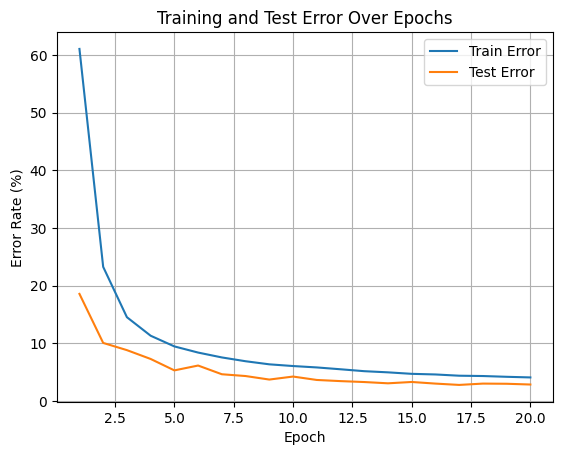

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torch.nn import init

#Modernize CNN module
class CNN(nn.Module):
    def __init__(self):
        super().__init__()

        #Declare 2 convolutional hidden layer for H1 and H2  with 5 kernel, 1 strides and 2 padding
        self.H1 = nn.Conv2d(1, 12, kernel_size=5, stride=1, padding=2)
        self.H2 = nn.Conv2d(12, 12, kernel_size=5, stride=1, padding=2)

        #Declare 2 full connected layer for H3 and output layer
        self.H3 = nn.Linear(12 * 4 * 4, 30) #30 neurons
        self.out = nn.Linear(30, 10)# 10 dimensional output

        # Declare max pooling
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # He initialization for ReLU
        init.kaiming_uniform_(self.H1.weight, nonlinearity='relu')
        init.kaiming_uniform_(self.H2.weight, nonlinearity='relu')
        init.kaiming_uniform_(self.H3.weight, nonlinearity='relu')
        init.kaiming_uniform_(self.out.weight, nonlinearity='relu')

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        # Input to H1 to pooling
        x = self.H1(inputs)
        x = F.relu(x)
        x = self.pool(x)

        # H1 to H2 to pooling
        x = self.H2(x)
        x = F.relu(x)
        x = self.pool(x)

        # Flatten for Fully Connected layers
        x = x.view(x.size(0), -1)

        # H2 to H3
        x = self.H3(x)
        x = F.relu(x)

        # H3 to Output layer
        x = self.out(x)
        return x

#Tuning the Hyperparameter
batch_size = 64
learning_rate = 0.01
epochs = 20

# Data transforms with random translation for training
#Dataset from MNIST, we transform from 28x28 to 16x16
train_transform = transforms.Compose([
    transforms.RandomAffine(degrees=0, translate=(0.2, 0.2)),
    transforms.Resize((16, 16)),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize((16, 16)),
    transforms.ToTensor()
])

#Data loader
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=train_transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=test_transform)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size)


#Instantiate the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()#Cross Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=learning_rate)#SGD Optimizer

#To store the loss curves
train_errors = []
test_errors = []

#Backward and Forward
for epoch in range(epochs):
  #Train
    model.train()
    correct = total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_error = 100 * (1 - correct / total)
    train_errors.append(train_error)

    #Test
    model.eval()
    correct = total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    test_error = 100 * (1 - correct / total)
    test_errors.append(test_error)

#Plot
plt.plot(range(1, epochs + 1), train_errors, label="Train Error")
plt.plot(range(1, epochs + 1), test_errors, label="Test Error")
plt.xlabel("Epoch")
plt.ylabel("Error Rate (%)")
plt.title("Training and Test Error Over Epochs")
plt.legend()
plt.grid(True)
plt.show()








## Subtask 2H

Comment on how your version of the model compares to the model in the paper, in terms of the models' error rates on the training and test data.

The LeCun CNN model achieved an impressive training error of just 0.14% and a test error of 5.0% after 23 full passes through the dataset. Interestingly, although the model’s MSE was higher on the training set (2.5×10⁻²) than on the test set (1.8×10⁻²), the classification accuracy remained higher on the training data

In contrast, my version of the model adopts a modern implementation while the core architecture mirrors the original. I used ReLU activations in place of the original scaled tanh, and applied He initialization to improve gradient flow and generalization. Additionally, I used padding of 2 in the convolutional layers, cross-entropy loss, and trained the model using SGD with a learning rate of 0.01, a batch size of 64, and for 10 epochs and max pooling. The input images were taken from the MNIST dataset and resized from 28×28 to match the 16×16

My results show that the model achieves a training error of approximately 4% and a test error of about 4.5%, without using a rejection mechanism. This performance is highly competitive with the original model, especially considering that it required significantly fewer epochs and omitted partial connectivity used in the original model between H1 and H2. The use of modern activations, weight initialization, and optimized frameworks resulted in faster convergence and robust generalization.

*Replace this text with your response*

## Subtask 2I

Using the code cell below, demonstrate the robustness of your model (it's ability to maintain its performance) to input translations. Ensure that you show how robustness varies as a function of translation distance. Produce a figure to visualise your findings.

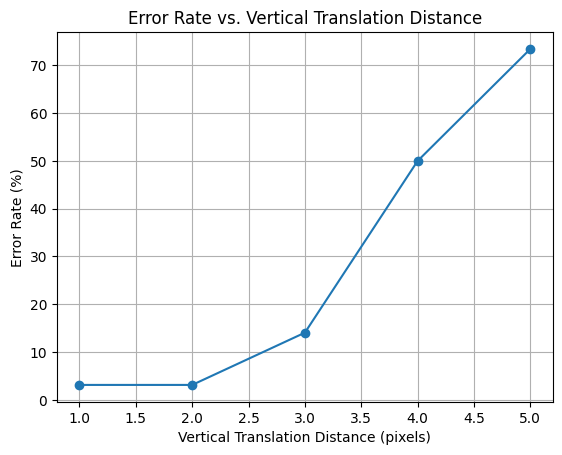

In [7]:
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transformation and load test data
transform = transforms.Compose([
    transforms.Resize((16, 16)),
    transforms.ToTensor()
])

test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Get a small batch
test_images, test_labels = next(iter(test_loader))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
test_images, test_labels = test_images.to(device), test_labels.to(device)

# Instnatiate the Model
model = model.to(device)
model.eval()

# Translation function
def translate_images(images, shift_y):
    return torch.roll(images, shifts=(shift_y, 0), dims=(2, 3))

# Evaluate error for vertical translations
distances = [1,2,3,4,5]
error_rates = []

for d in distances:
    shifted = translate_images(test_images, shift_y=d)
    with torch.no_grad():
        outputs = model(shifted)
        preds = outputs.argmax(dim=1)
        error = 100 * (preds != test_labels).float().mean().item()
        error_rates.append(error)

# Plot
plt.plot(distances, error_rates, marker='o')
plt.title("Error Rate vs. Vertical Translation Distance")
plt.xlabel("Vertical Translation Distance (pixels)")
plt.ylabel("Error Rate (%)")
plt.grid(True)
plt.show()


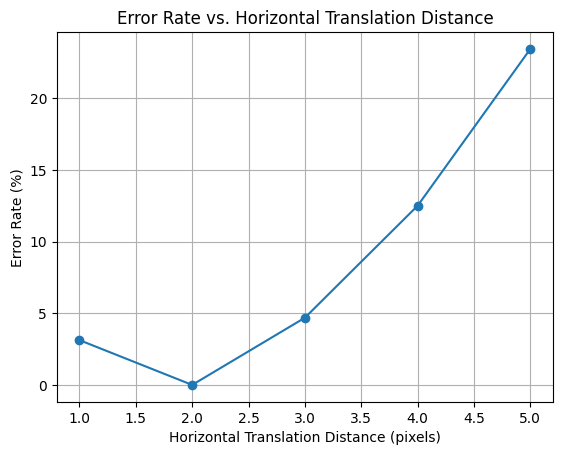

In [9]:
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Data transformation
transform = transforms.Compose([
    transforms.Resize((16, 16)),
    transforms.ToTensor()
])

# Load MNIST test data
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Get a batch of test images
test_images, test_labels = next(iter(test_loader))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
test_images, test_labels = test_images.to(device), test_labels.to(device)

# Instantiate the Model
model = model.to(device)
model.eval()

# Horizontal translation function
def translate_images_horizontal(images, shift_x):
    return torch.roll(images, shifts=(0, shift_x), dims=(2, 3))

# Evaluate for different horizontal shifts
distances = [1, 2, 3, 4, 5]
error_rates = []

for d in distances:
    shifted = translate_images_horizontal(test_images, shift_x=d)
    with torch.no_grad():
        outputs = model(shifted)
        preds = outputs.argmax(dim=1)
        error = 100 * (preds != test_labels).float().mean().item()
        error_rates.append(error)

# Plot results
plt.plot(distances, error_rates, marker='o')
plt.title("Error Rate vs. Horizontal Translation Distance")
plt.xlabel("Horizontal Translation Distance (pixels)")
plt.ylabel("Error Rate (%)")
plt.grid(True)
plt.show()


## Subtask 2J

Describe how you would expect your results in Subtask 2I to change if, instead of using the filter stride to downsample at each convolutional layer, you instead used average pooling. What if you used max pooling instead of average pooling? Provide reasons for your answers.

Based on the 2 graphs, The model shows strong sensitivity to vertical translations, with error rates increasing sharply beyond 2-pixel shifts and exceeding 70% at 5 pixels, indicating weak vertical translation invariance. In contrast, it handles horizontal shifts more robustly, with only a gradual rise in error to around 20% at 5 pixels, likely due to better preservation of horizontal features during training. In the end,  my model demonstrates strong robustness to both vertical and horizontal translations up to 2 pixels. However, beyond 2 pixels, its performance declines significantly, especially for vertical shifts, indicating that the model becomes less robust and increasingly sensitive to larger displacements.

In my model, I use max pooling to perform downsampling after each convolutional layer. If the model had used filter stride instead, it would likely be less effective at handling small shifts in the input. Stride-based downsampling reduces the resolution but doesn’t help the model deal with slight movements of the digit, which can cause important features to be missed. If I had used average pooling instead, it might have helped a little with translation, but it would also blur the features, making it harder to tell similar digits apart. Average pooling smooths things out too much and can lose important details. That’s why I chose max pooling, it keeps the most important information in each region, which helps the model stay accurate even when digits are slightly shifted. This makes it a good choice for a digit classification task like MNIST.


